<a href="https://colab.research.google.com/github/mvmelo57/dockerhub-example/blob/main/DL_Aula_16_3_5_Aplica%C3%A7%C3%A3o_de_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Aplicação de RNN***

Redes Neurais Recorrentes

SMS Spam
- Vamos implementar um detector de SPAM
- O treinamento é com a base SMS Spam
-- Coleção de textos de SMS rotulados como legítimos (ham) ou spam
-- https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
-- 5.574 mensagens
-- 87% mensagens normais
-- 13% spam

In [13]:
# Importação das Bibliotecas
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [14]:
# carrega e arruma a base
!wget http://www.razer.net.br/datasets/spam.csv
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")
df.head()
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df.columns = ["labels", "data"]
df["b_labels"] = df["labels"].map({ "ham": 0, "spam": 1})
y = df["b_labels"].values

--2025-08-23 00:24:10--  http://www.razer.net.br/datasets/spam.csv
Resolving www.razer.net.br (www.razer.net.br)... 178.128.150.229
Connecting to www.razer.net.br (www.razer.net.br)|178.128.150.229|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [application/octet-stream]
Saving to: ‘spam.csv.1’

spam.csv.1          100%[===================>] 491.86K  --.-KB/s    in 0.1s    

2025-08-23 00:24:11 (4.19 MB/s) - ‘spam.csv.1’ saved [503663/503663]



In [15]:
# Separa a base em treino e teste
x_train, x_test, y_train, y_test = train_test_split(df["data"], y,
test_size=0.33)

In [16]:
# Número máximo de palavras para considerar
# São consideradas as mais frequentes, as demais são
# ignoradas
num_words = 20000
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(x_train)
sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)
word2index = tokenizer.word_index
V = len(word2index)
print("%s tokens" % V)

7172 tokens


In [17]:
# Acerta o tamanho das sequências (padding)
data_train = pad_sequences(sequences_train) # usa o tamanho da maior seq.
T = data_train.shape[1] # tamanho da sequência
data_test = pad_sequences(sequences_test, maxlen=T)
print("data_train.shape: ", data_train.shape)
print("data_test.shape: ", data_test.shape)

data_train.shape:  (3733, 189)
data_test.shape:  (1839, 189)


In [18]:
# Define o modelo
D = 20 # tamanho do embedding, hiperparâmetro que pode ser escolhido
M = 5 # tamanho do hidden state, quantidade de unidades LSTM
i = Input(shape=(T,)) # Entra uma frase inteira
x = Embedding(V+1, D)(i)
x = LSTM(M)(x)
x = Dense(1, activation="sigmoid")(x) # Sigmoide pois só tem 2 valores
model = Model(i, x)

In [19]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 189)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 189, 20)        │       143,460 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 5)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 143,986 (562.45 KB)

 Trainable params: 143,986 (562.45 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Compila e treina o modelo
model.compile(loss="binary_crossentropy", optimizer="adam",
metrics=["accuracy"])
epochs = 5
r = model.fit(data_train, y_train, epochs=epochs, validation_data=(data_test,
y_test))

Epoch 1/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.8485 - loss: 0.5708 - val_accuracy: 0.8853 - val_loss: 0.2731
Epoch 2/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - accuracy: 0.9287 - loss: 0.2310 - val_accuracy: 0.9685 - val_loss: 0.1561
Epoch 3/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.9816 - loss: 0.1359 - val_accuracy: 0.9831 - val_loss: 0.1074
Epoch 4/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.9914 - loss: 0.0872 - val_accuracy: 0.9864 - val_loss: 0.0822
Epoch 5/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.9966 - loss: 0.0595 - val_accuracy: 0.9869 - val_loss: 0.0706


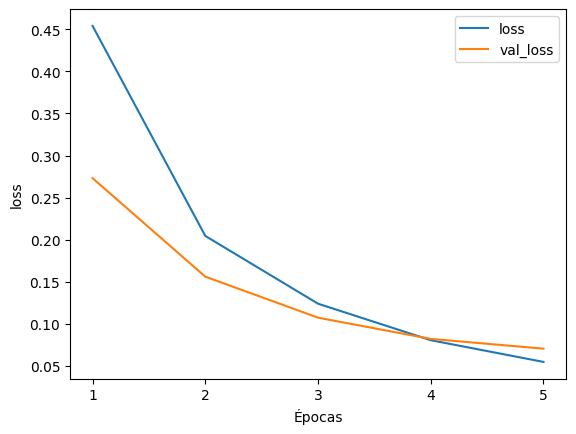

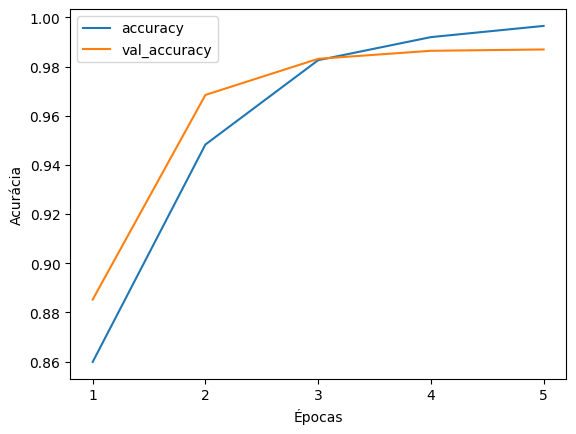

In [21]:
# Plota função de perda e acurácia
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.xlabel("Épocas")
plt.ylabel("loss")
plt.xticks(np.arange(0, epochs, step=1), labels=range(1, epochs+1))
plt.legend()
plt.show()
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.xticks(np.arange(0, epochs, step=1), labels=range(1, epochs+1))
plt.legend()
plt.show()

In [22]:
# Efetua a predição de um texto novo
#texto = "Hi, my name is Razer and want to tell you something."
texto = "Is your car dirty? Discover our new product. Free for all. Click the link."
seq_texto = tokenizer.texts_to_sequences([texto]) # Tokeniza
data_texto = pad_sequences(seq_texto, maxlen=T) # Padding
pred = model.predict(data_texto) # Predição
print(pred)
print ("SPAM" if pred >= 0.5 else "OK")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
[[0.6560018]]
SPAM


In [23]:
# Efetua a predição de um texto novo
texto = "Hi, my name is Razer and want to tell you something."
#texto = "Is your car dirty? Discover our new product. Free for all. Click the link."
seq_texto = tokenizer.texts_to_sequences([texto]) # Tokeniza
data_texto = pad_sequences(seq_texto, maxlen=T) # Padding
pred = model.predict(data_texto) # Predição
print(pred)
print ("SPAM" if pred >= 0.5 else "OK")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[0.01516588]]
OK
